# Cleaning anomalies in time series per region slug



## Load  libraries

In [172]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path = sys.path + [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/soniame/.conda/envs/norm_env'

from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

#### Run single

In [175]:
from src.runners.clean import _run_single 

2021-04-15 16:07:34.888 | INFO     | src.runners.clean:_run_single:689 - ... here we go lima...

2021-04-15 16:07:34.889 | DEBUG    | src.runners.clean:_reading_data:601 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('lima')
        
2021-04-15 16:07:40.821 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-15 16:07:40.825 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-15 16:07:40.825 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-15 16:07:40.826 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-15 16:07:40.827 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a c

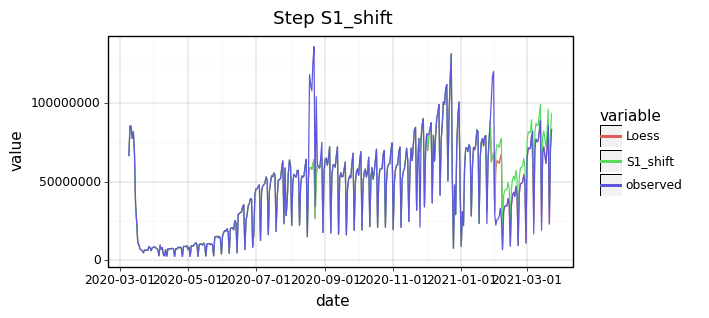

2021-04-15 16:07:42.286 | DEBUG    | src.runners.clean:_run_step:675 - ... step done ...
2021-04-15 16:07:42.291 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-15 16:07:42.292 | INFO     | src.runners.clean:_run_step:630 - Target variable: S1_shift 

2021-04-15 16:07:42.292 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-15 16:07:42.293 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating S1_shift...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

<ggplot: (8776056705353)>


2021-04-15 16:07:43.067 | DEBUG    | src.runners.clean:_run_shift_grid:339 - Total combinations: 25
2021-04-15 16:07:43.361 | DEBUG    | src.runners.clean:_initial_shift_date:416 - Shift found at 2021-03-02 00:00:00
2021-04-15 16:07:43.364 | DEBUG    | src.runners.clean:_shift_ts:439 - 

2021-04-15 16:07:43.366 | DEBUG    | src.runners.clean:_shift_ts:440 - Center point: -13157026.999999993
../src/runners/clean.py:444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


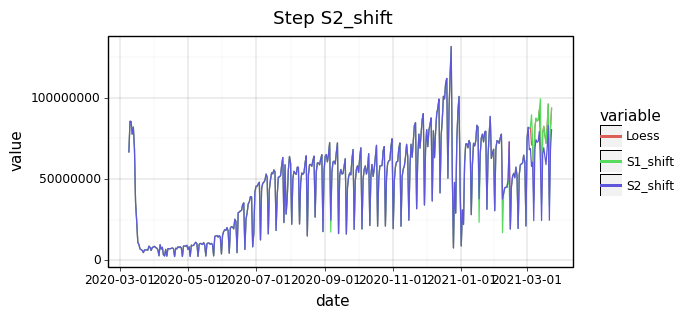

2021-04-15 16:07:43.738 | DEBUG    | src.runners.clean:_run_step:675 - ... step done ...


<ggplot: (8776049228721)>


2021-04-15 16:07:44.098 | DEBUG    | src.runners.clean:_write_missing:608 - ... writing anomalies file ...


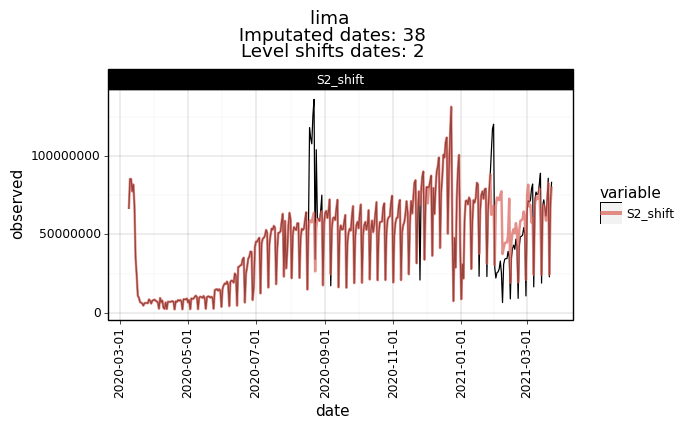

<ggplot: (8776050478657)>


/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_lima.pdf
2021-04-15 16:07:45.948 | INFO     | src.runners.clean:_run_single:762 - ... lima done ...



In [176]:
daily, weekly = _run_single(region_slug='lima', 
                            anomaly_vote_minimun_s1=1, 
                            anomaly_vote_minimun_s2=1, 
                            print_report = False, 
                            print_plot = True)

In [8]:
p9.theme_set(p9.theme_linedraw()) # default theme

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [27]:
daily.head(3)
(p9.ggplot(daily, p9.aes(x = 'date', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

NameError: name 'p9' is not defined

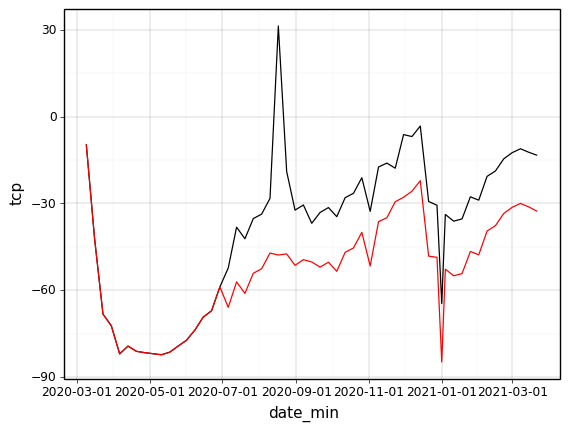

<ggplot: (8770633651653)>

In [10]:
weekly.head(3)
(p9.ggplot(weekly, p9.aes(x = 'date_min', y='tcp')) 
 + p9.geom_line() 
 + p9.geom_line(p9.aes( y='tcp_clean'), color = 'red'))

#### Run by batch

In [30]:
from src.runners.clean import _run_batch 

In [31]:
_run_batch(athena_path = "/home/soniame/shared/spd-sdv-omitnik-waze/corona")

2021-04-14 15:19:43.573 | INFO     | src.runners.clean:_run_batch:775 - Total regions process108
2021-04-14 15:19:43.574 | INFO     | src.runners.clean:_run_single:689 - ... here we go aguascalientes...

2021-04-14 15:19:43.574 | DEBUG    | src.runners.clean:_reading_data:601 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('aguascalientes')
        


aguascalientes


2021-04-14 15:19:46.038 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2017535388086094
2021-04-14 15:19:46.041 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:19:46.042 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:19:46.043 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:19:46.044 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

arequipa


2021-04-14 15:19:52.547 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.3550628957618158
2021-04-14 15:19:52.550 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:19:52.551 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:19:52.552 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:19:52.553 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

barranquilla


2021-04-14 15:19:58.062 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.6099913028849735
2021-04-14 15:19:58.066 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:19:58.067 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:19:58.067 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:19:58.069 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

belem


2021-04-14 15:20:04.582 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.8643735989356471
2021-04-14 15:20:04.585 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:04.586 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:04.586 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:04.588 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

belohorizonte


2021-04-14 15:20:11.444 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.3395578113333118
2021-04-14 15:20:11.447 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:11.448 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:11.448 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:11.450 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

bogota


2021-04-14 15:20:18.033 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.5337689808250223
2021-04-14 15:20:18.036 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:18.037 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:18.037 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:18.038 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

br_states_acre


2021-04-14 15:20:24.430 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:24.434 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:24.434 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:24.435 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:24.436 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_alagoas


2021-04-14 15:20:29.775 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:29.778 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:29.779 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:29.780 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:29.781 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_amapa


2021-04-14 15:20:35.401 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:35.404 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:35.405 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:35.407 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:35.408 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_amazonas


2021-04-14 15:20:41.062 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:41.065 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:41.066 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:41.066 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:41.067 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_bahia


2021-04-14 15:20:47.493 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:47.496 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:47.497 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:47.498 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:47.499 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_ceara


2021-04-14 15:20:53.985 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:20:53.989 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:20:53.990 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:20:53.990 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:20:53.992 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_distrito_federal


2021-04-14 15:21:00.322 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:00.325 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:00.326 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:00.326 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:00.327 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_espirito_santo


2021-04-14 15:21:06.892 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:06.897 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:06.898 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:06.898 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:06.899 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_goias


2021-04-14 15:21:13.685 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:13.689 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:13.690 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:13.690 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:13.691 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_maranhao


2021-04-14 15:21:20.248 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:20.251 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:20.252 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:20.252 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:20.254 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_mato_grosso


2021-04-14 15:21:26.629 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:26.632 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:26.633 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:26.633 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:26.635 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_mato_grosso_do_sul


2021-04-14 15:21:33.149 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:33.152 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:33.153 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:33.153 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:33.154 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_minas_gerais


2021-04-14 15:21:40.051 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:40.054 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:40.055 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:40.056 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:40.057 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_para


2021-04-14 15:21:46.901 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:46.904 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:46.905 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:46.906 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:46.907 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_paraiba


2021-04-14 15:21:52.216 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:52.219 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:52.220 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:52.221 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:52.222 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_parana


2021-04-14 15:21:58.620 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:21:58.624 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:21:58.625 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:21:58.625 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:21:58.626 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_pernambuco


2021-04-14 15:22:04.036 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:04.039 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:04.040 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:04.041 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:04.042 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_piaui


2021-04-14 15:22:09.457 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:09.460 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:09.461 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:09.462 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:09.463 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_rio_de_janeiro


2021-04-14 15:22:15.491 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:15.495 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:15.495 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:15.496 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:15.497 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_rio_grande_do_norte


2021-04-14 15:22:21.803 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:21.806 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:21.808 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:21.808 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:21.809 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_rio_grande_do_sul


2021-04-14 15:22:27.297 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:27.300 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:27.301 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:27.303 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:27.305 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_rondonia


2021-04-14 15:22:32.597 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:32.600 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:32.601 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:32.602 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:32.603 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_roraima


2021-04-14 15:22:37.990 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:37.993 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:37.994 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:37.995 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:37.996 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_santa_catarina


2021-04-14 15:22:43.380 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:43.383 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:43.384 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:43.386 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:43.388 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_sao_paulo


2021-04-14 15:22:50.328 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:50.332 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:50.333 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:50.333 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:50.334 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_sergipe


2021-04-14 15:22:55.602 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:22:55.605 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:22:55.606 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:22:55.606 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:22:55.608 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

br_states_tocantins


2021-04-14 15:23:01.003 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:23:01.006 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:01.007 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:01.008 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:01.009 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

brasilia


2021-04-14 15:23:08.643 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3.0850564156837903
2021-04-14 15:23:08.646 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:08.647 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:08.647 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:08.649 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

bucaramanga


2021-04-14 15:23:14.271 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.1670126125047595
2021-04-14 15:23:14.274 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:14.275 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:14.277 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:14.278 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

buenosaires


2021-04-14 15:23:21.038 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.8184037250836809
2021-04-14 15:23:21.041 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:21.042 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:21.042 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:21.044 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

cali


2021-04-14 15:23:26.452 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2876372837112804
2021-04-14 15:23:26.455 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:26.456 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:26.457 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:26.458 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

campinas


2021-04-14 15:23:33.321 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.805447460526414
2021-04-14 15:23:33.325 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:33.326 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:33.326 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:33.327 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

cartagena


2021-04-14 15:23:39.077 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.2485664478579075
2021-04-14 15:23:39.080 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:39.081 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:39.082 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:39.083 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

cordoba


2021-04-14 15:23:45.900 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.8648801303007363
2021-04-14 15:23:45.904 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:45.904 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:45.905 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:45.906 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-14 15:23:45.935 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

country_argentina


2021-04-14 15:23:52.295 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.8016356347904302
2021-04-14 15:23:52.299 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:52.299 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:52.300 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:52.301 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-14 15:23:52.330 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

country_barbados


2021-04-14 15:23:57.517 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.196880006395557
2021-04-14 15:23:57.521 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:23:57.521 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:23:57.523 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:23:57.525 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

country_brazil


2021-04-14 15:24:04.439 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:24:04.442 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:04.443 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:04.443 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:04.446 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_chile


2021-04-14 15:24:11.266 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.641380978624544
2021-04-14 15:24:11.269 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:11.270 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:11.271 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:11.272 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

country_colombia


2021-04-14 15:24:16.767 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.9415626101244152
2021-04-14 15:24:16.771 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:16.771 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:16.772 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:16.773 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

country_costa_rica


2021-04-14 15:24:23.128 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.954229638987956
2021-04-14 15:24:23.131 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:23.132 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:23.133 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:23.134 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

country_dominican_republic


2021-04-14 15:24:30.255 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.7414036247718596
2021-04-14 15:24:30.258 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:30.259 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:30.259 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:30.260 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

country_ecuador


2021-04-14 15:24:35.602 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.2855355554972492
2021-04-14 15:24:35.605 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:35.606 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:35.607 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:35.608 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

country_el_salvador


2021-04-14 15:24:41.967 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.202588702986474
2021-04-14 15:24:41.970 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:41.971 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:41.973 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:41.975 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

country_guatemala


2021-04-14 15:24:47.571 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.1917023946455596
2021-04-14 15:24:47.574 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:47.575 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:47.575 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:47.577 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

country_honduras


2021-04-14 15:24:53.869 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:24:53.872 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:24:53.873 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:24:53.874 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:24:53.874 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_jamaica


2021-04-14 15:25:00.213 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 0.7498942230624924
2021-04-14 15:25:00.216 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:00.217 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:00.217 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:00.218 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

country_mexico


2021-04-14 15:25:05.914 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:05.917 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:05.918 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:05.918 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:05.920 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_nicaragua


2021-04-14 15:25:11.283 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:11.286 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:11.287 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:11.287 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:11.288 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_panama


2021-04-14 15:25:16.829 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:16.832 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:16.833 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:16.834 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:16.835 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_paraguay


2021-04-14 15:25:23.567 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:23.570 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:23.571 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:23.571 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:23.572 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_peru


2021-04-14 15:25:28.881 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:28.885 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:28.886 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:28.886 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:28.887 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_trinidad_and_tobago


2021-04-14 15:25:34.099 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:34.102 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:34.103 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:34.104 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:34.105 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
20

country_uruguay


2021-04-14 15:25:40.356 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3
2021-04-14 15:25:40.359 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:40.360 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:40.361 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:40.361 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-14 15:25:40.390 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

cucuta


2021-04-14 15:25:45.925 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.6427136549548218
2021-04-14 15:25:45.928 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:45.929 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:45.929 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:45.931 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-14 15:25:45.960 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

cuenca


2021-04-14 15:25:51.197 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.6170417968667807
2021-04-14 15:25:51.201 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:51.202 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:51.202 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:51.203 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

curitiba


2021-04-14 15:25:57.717 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.98093354029194
2021-04-14 15:25:57.722 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:25:57.723 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:25:57.725 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:25:57.726 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

fortaleza


2021-04-14 15:26:03.165 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.719514677860288
2021-04-14 15:26:03.168 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:03.169 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:03.169 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:03.171 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

goiania


2021-04-14 15:26:08.591 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.5133914293872057
2021-04-14 15:26:08.595 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:08.596 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:08.596 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:08.597 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

guadalajara


2021-04-14 15:26:15.165 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.2734105172872836
2021-04-14 15:26:15.168 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:15.169 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:15.170 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:15.171 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

guatemala


2021-04-14 15:26:20.735 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2958850915135858
2021-04-14 15:26:20.738 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:20.739 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:20.740 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:20.741 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

guayaquil


2021-04-14 15:26:28.191 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.8232802453597765
2021-04-14 15:26:28.194 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:28.195 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:28.195 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:28.197 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

joaopessoa


2021-04-14 15:26:35.840 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2799310834860425
2021-04-14 15:26:35.844 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:35.845 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:35.845 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:35.846 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

kingston


2021-04-14 15:26:41.268 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 4.586588706926463
2021-04-14 15:26:41.271 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:41.272 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:41.273 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:41.274 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

leon


2021-04-14 15:26:47.964 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.0422131339394225
2021-04-14 15:26:47.967 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:47.968 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:47.970 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:47.972 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

lima


2021-04-14 15:26:54.635 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.2790391344310827
2021-04-14 15:26:54.639 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:26:54.639 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:26:54.640 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:26:54.641 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

maceio


2021-04-14 15:27:00.067 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2583308471432715
2021-04-14 15:27:00.070 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:00.071 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:00.071 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:00.073 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

managua


2021-04-14 15:27:05.513 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.9488733875010116
2021-04-14 15:27:05.516 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:05.517 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:05.518 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:05.519 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

manaus


2021-04-14 15:27:11.926 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.5261392077327183
2021-04-14 15:27:11.930 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:11.931 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:11.931 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:11.932 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

medellin


2021-04-14 15:27:18.532 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3.3884650956003943
2021-04-14 15:27:18.536 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:18.536 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:18.537 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:18.538 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

merida


2021-04-14 15:27:24.083 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.270581156627648
2021-04-14 15:27:24.086 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:24.087 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:24.088 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:24.089 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

mexicocity


2021-04-14 15:27:31.049 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.5326466521027249
2021-04-14 15:27:31.052 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:31.053 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:31.054 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:31.055 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

monterrey


2021-04-14 15:27:37.234 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.377120711011377
2021-04-14 15:27:37.238 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:37.239 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:37.239 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:37.240 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

montevideo


2021-04-14 15:27:43.728 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.0803311522853742
2021-04-14 15:27:43.732 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:43.733 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:43.733 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:43.734 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

2021-04-14 15:27:43.763 | DEBUG    | src.runners.clean:_outlier_seasonal_ad:101 - !! No Seasonal !!
../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

natal


2021-04-14 15:27:50.522 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2969261300679054
2021-04-14 15:27:50.525 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:50.526 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:50.527 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:50.527 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

panamacity


2021-04-14 15:27:55.924 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 5.907090004197137
2021-04-14 15:27:55.927 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:27:55.928 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:27:55.929 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:27:55.930 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

pereira


2021-04-14 15:28:01.334 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.8916583612040607
2021-04-14 15:28:01.337 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:01.338 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:01.339 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:01.340 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

porto_alergre


2021-04-14 15:28:08.073 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.663651971895372
2021-04-14 15:28:08.076 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:08.077 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:08.078 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:08.079 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

pueble


2021-04-14 15:28:14.630 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.1688629266215558
2021-04-14 15:28:14.633 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:14.634 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:14.635 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:14.636 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

queretaro


2021-04-14 15:28:21.072 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.6487595765672347
2021-04-14 15:28:21.076 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:21.076 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:21.077 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:21.078 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

quito


2021-04-14 15:28:26.464 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.4630701968581974
2021-04-14 15:28:26.467 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:26.468 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:26.469 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:26.470 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

recife


2021-04-14 15:28:31.831 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.046776023233241
2021-04-14 15:28:31.834 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:31.835 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:31.836 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:31.837 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

riodejaneiro


2021-04-14 15:28:38.533 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.2632293285889094
2021-04-14 15:28:38.536 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:38.537 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:38.538 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:38.539 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

rosario


2021-04-14 15:28:44.863 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.3159044860585751
2021-04-14 15:28:44.867 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:44.868 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:44.868 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:44.869 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

salvador


2021-04-14 15:28:52.330 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3.5379190494498114
2021-04-14 15:28:52.334 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:52.334 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:52.335 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:52.335 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

sanjose


2021-04-14 15:28:57.604 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.8090989605897967
2021-04-14 15:28:57.607 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:28:57.608 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:28:57.609 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:28:57.610 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

sanluispotosi


2021-04-14 15:29:03.712 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.28029450297837
2021-04-14 15:29:03.715 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:03.716 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:03.717 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:03.718 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

sansalvador


2021-04-14 15:29:10.042 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 4.402981503263397
2021-04-14 15:29:10.046 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:10.047 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:10.047 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:10.049 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

santacruzdelasierra


2021-04-14 15:29:15.235 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.9501655650589362
2021-04-14 15:29:15.239 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:15.240 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:15.241 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:15.242 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

santamarta


2021-04-14 15:29:20.654 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.4799041689618395
2021-04-14 15:29:20.657 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:20.658 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:20.658 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:20.660 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

santiago


2021-04-14 15:29:27.231 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3.9028503342299485
2021-04-14 15:29:27.234 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:27.235 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:27.235 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:27.237 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

santiagocaballeros


2021-04-14 15:29:32.722 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.906513224223761
2021-04-14 15:29:32.726 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:32.727 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:32.727 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:32.729 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

2021-04-14 15:29:35.295 | DEBUG    | src.runners.clean:_write_missing:608 - ... writing anomalies file ...
/home/soniame/.conda/envs/IDB-IDB-Invest-Coronavirus-Impact-Dashboard/lib/python3.7/site-packages/plotnine/ggplot.py:848: PlotnineWarning: Filename: /home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/figures/plot_santiagocaballeros.pdf
2021-04-14 15:29:36.625 | INFO     | src.runners.clean:_run_single:762 - ... santiagocaballeros done ...

2021-04-14 15:29:36.626 | INFO     | src.runners.clean:_run_single:689 - ... here we go santodomingo...

2021-04-14 15:29:36.627 | DEBUG    | src.runners.clean:_reading_data:601 - 
        select 
            *,
            date_parse(concat(cast(year as varchar), ' ', cast(month as varchar), ' ', cast(day as varchar)), '%Y %m %e') date
        from spd_sdv_waze_corona.prod_daily_daily_index
        where region_slug in ('santodomingo')
        


santodomingo


2021-04-14 15:29:40.299 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.821616978994109
2021-04-14 15:29:40.302 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:40.303 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:40.303 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:40.304 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

santos


2021-04-14 15:29:46.782 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.7709116749071978
2021-04-14 15:29:46.786 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:46.787 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:46.787 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:46.789 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

saojosedoscampos


2021-04-14 15:29:53.592 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.496766583219894
2021-04-14 15:29:53.595 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:53.596 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:53.596 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:53.598 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

saoluis


2021-04-14 15:29:58.976 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.106689226348016
2021-04-14 15:29:58.980 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:29:58.980 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:29:58.981 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:29:58.982 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

saopaulo


2021-04-14 15:30:06.284 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.724100408232036
2021-04-14 15:30:06.289 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:06.290 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:06.290 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:06.292 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

sorocaba


2021-04-14 15:30:12.931 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.3446258273738656
2021-04-14 15:30:12.934 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:12.935 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:12.936 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:12.937 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

tegucigalpa


2021-04-14 15:30:18.564 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 3.6413391221738767
2021-04-14 15:30:18.567 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:18.568 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:18.568 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:18.570 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

teresina


2021-04-14 15:30:24.131 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.1501725975181225
2021-04-14 15:30:24.134 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:24.135 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:24.135 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:24.137 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

toluca


2021-04-14 15:30:30.579 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 1.6867819438227345
2021-04-14 15:30:30.583 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:30.584 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:30.584 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:30.586 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

torreon


2021-04-14 15:30:36.335 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 7.256580364878214
2021-04-14 15:30:36.338 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:36.339 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:36.339 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:36.341 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

vitoria


2021-04-14 15:30:41.833 | DEBUG    | src.runners.clean:_c_param:271 - c_param: 2.3753494688038708
2021-04-14 15:30:41.837 | DEBUG    | src.runners.clean:_run_step:629 - ... step start ...
2021-04-14 15:30:41.838 | INFO     | src.runners.clean:_run_step:630 - Target variable: observed 

2021-04-14 15:30:41.838 | DEBUG    | src.runners.clean:_find_anomalies:160 - 
... finding outliers ...
2021-04-14 15:30:41.839 | DEBUG    | src.runners.clean:_validate_series:55 - ... validating observed...

../src/runners/clean.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
../src/runners/clean.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [ ]:
df = pd.read_csv("/home/soniame/shared/spd-sdv-omitnik-waze/corona/cleaning/daily/daily_daily_index.csv")
head(df)

In [ ]:
#plt.scatter(df.tcp, df.tcp_clean)
#df[['date', 'region_slug', 'tcp_clean']] 

In [ ]:
df.head()
df.describe()

In [ ]:
df.region_slug.unique()

In [ ]:
(df
 >> group_by('region_slug')
 >> summarize(min_tcp = _.tcp_clean.abs().min(),
              max_tcp = _.tcp_clean.abs().max(), 
              min_baseline = _.expected_2020.abs().min()/1e6,
              max_baseline = _.expected_2020.abs().max()/1e6,
              min_observed = _.observed.abs().min()/1e6,
              max_observed = _.observed.abs().max()/1e6,
              min_cleaned = _.S2_shift.abs().min()/1e6,
              max_cleaned = _.S2_shift.abs().max()/1e6
              )
 >> arrange(_.max_tcp)
).tail(15)

#### Step run

In [ ]:
df_cty = _load_data()

In [ ]:
df_run_1 = _run_step(df_run = df_cty[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
df_run_1.head()

In [ ]:
df_run_2 = _run_step(df_run = df_run_1[['date', 'S1_shift']].sort_values(by=['date']),
                         anomaly_vote_minimun = 1, 
                         c_param=_c_param(region_slug),
                         target_column_name = 'S1_shift',
                         output_column_name = 'S2_shift',
                         print_report = False, 
                         print_plot = True)

In [ ]:
qry = """
select 
    *
from spd_sdv_waze_corona.prod_daily_weekly_index
limit 10
"""
df = pd.read_sql_query(qry, conn)

In [ ]:
df.columns #sort_values('week_number')

In [17]:
import pandas as pd
metadata = pd.read_csv("http://tiny.cc/idb-traffic-metadata")

In [23]:
print(len(metadata.region_slug))
print(metadata.region_slug.unique())

metadata.head()

139
['country_guatemala' 'barranquilla' 'buenosaires' 'caracas'
 'br_states_maranhao' 'maracay' 'country_dominican_republic' 'saopaulo'
 'manaus' 'br_states_minas_gerais' 'montevideo' 'merida' 'ciudad_guayana'
 'br_states_amazonas' 'lapaz' 'country_peru' 'sanpedrosula'
 'country_argentina' 'br_states_rio_de_janeiro' 'cordoba'
 'country_el_salvador' 'bucaramanga' 'tijuana' 'medellin'
 'br_states_mato_grosso' 'maceio' 'br_states_pernambuco' 'guayaquil'
 'br_states_paraiba' 'country_nicaragua' 'santodomingo' 'panamacity'
 'sanfernado' 'arequipa' 'country_uruguay' 'guatemala' 'natal'
 'sanluispotosi' 'georgetown' 'br_states_santa_catarina' 'santamarta'
 'sansalvador' 'juarez' 'br_states_para' 'salvador' 'br_states_alagoas'
 'br_states_espirito_santo' 'tegucigalpa' 'country_costa_rica'
 'br_states_bahia' 'bridgetown' 'riodejaneiro' 'cucuta' 'br_states_amapa'
 'toluca' 'bogota' 'managua' 'country_honduras' 'queretaro'
 'br_states_piaui' 'leon' 'country_paraguay' 'country_guyana'
 'country_ja

,country_name,country_iso,region_slug,region_name,region_type,population,timezone,region_shapefile_wkt,osm_length,daily_coef_var,...,daily_coef_var_weekday,weekend_osm_ratio,weekday_osm_ratio,daily_approved,weekly_approved,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Guatemala,GT,country_guatemala,Guatemala,country,17915567.0,America/Guatemala,MULTIPOLYGON (((-92.2393264773401 14.541251788...,5.664239e+07,0.257001,...,0.253105,0.958859,1.153470,True,True,NaN,NaN,NaN,NaN,NaN
1,Colombia,CO,barranquilla,Barranquilla,city,1931750.0,America/Bogota,POLYGON ((-74.83374991971161 11.04958488300598...,2.609151e+06,0.316392,...,0.346008,3.327034,4.944916,True,True,NaN,NaN,NaN,NaN,NaN
2,Argentina,AR,buenosaires,Buenos Aires,city,14338718.0,America/Argentina/Buenos_Aires,POLYGON ((-58.75041764050466 -34.3670848864218...,3.033681e+07,0.326066,...,0.423715,1.914411,2.969939,True,True,NaN,NaN,NaN,NaN,NaN
3,Venezuela,VE,caracas,Caracas,city,2408266.0,America/Caracas,POLYGON ((-67.00833333335606 10.39999999997973...,3.187649e+06,0.758516,...,1.737158,0.571506,1.639975,False,False,NaN,NaN,NaN,NaN,NaN
4,Brasil,BR,br_states_maranhao,Maranhao,state,NaN,NaN,POLYGON ((-45.84073319904228 -1.04548473090940...,7.803499e+07,0.355675,...,0.421830,0.376916,0.475001,True,True,NaN,NaN,NaN,NaN,NaN


In [31]:
metadata[metadata.region_slug == 'mexicocity'].region_shapefile_wkt.to_list()

['POLYGON ((-99.22541498771096 19.79958548078565, -99.19208165656235 19.79958548078565, -99.17541499098803 19.77458547907771, -99.15041499262657 19.77458547907771, -99.15041499262657 19.73291880956447, -99.12541499426511 19.73291880956447, -99.10041499590365 19.70791880785653, -99.06708166475504 19.71625214175918, -99.06708166475504 19.69125214005124, -98.99208166967065 19.70791880785653, -98.96708167130919 19.74125214346712, -98.92541500737342 19.69958547395388, -98.95041500573488 19.69125214005124, -98.95874833852204 19.65791880444065, -98.97541500409635 19.65791880444065, -98.96708167130919 19.63291880273271, -98.94208167294772 19.63291880273271, -98.91708167458627 19.65791880444065, -98.8754150106505 19.649585470538, -98.88374834343765 19.63291880273271, -98.90874834179911 19.63291880273271, -98.88374834343765 19.61625213492741, -98.89208167622481 19.59125213321947, -98.85041501228903 19.54125212980358, -98.85041501228903 19.49958546029035, -98.8754150106505 19.47458545858241, -98.